In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport

In [8]:
font = r'wine.csv'

dataset = pd.DataFrame()

dataset = pd.read_csv(font, sep=',')

In [6]:
#dataset = dataset.rename(columns={"plasma glucose": "Glucose", "Diastolic blood pressure": "BloodPressure", "Triceps skin fold thickness" : "SkinThickness", "2-Hour serum insulin" : "Insulin", "Body mass index" : "BMI", "Diabetes pedigree function" : "DiabetesPedigree", "target" : "Outcome"})

In [9]:
dataset

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,0D280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
file = ProfileReport(dataset)
file.to_file(output_file='output.html')

In [8]:
#with_diabetes = dataset.loc[dataset['Outcome'] == 1]
#no_diabetes   = dataset.loc[dataset['Outcome'] == 0]

#with_diabetes = with_diabetes.replace({'SkinThickness':0}, np.median(with_diabetes['SkinThickness']))
#no_diabetes = no_diabetes.replace({'SkinThickness':0}, np.median(no_diabetes['SkinThickness']))
#with_diabetes = with_diabetes.replace({'Insulin':0}, np.median(with_diabetes['Insulin']))
#no_diabetes = no_diabetes.replace({'Insulin':0}, np.median(no_diabetes['Insulin']))
#with_diabetes = with_diabetes.replace({'Glucose':0}, np.median(with_diabetes['Glucose']))
#no_diabetes = no_diabetes.replace({'Glucose':0}, np.median(no_diabetes['Glucose']))
#with_diabetes = with_diabetes.replace({'BMI':0}, np.median(with_diabetes['BMI']))
#no_diabetes = no_diabetes.replace({'BMI':0}, np.median(no_diabetes['BMI']))
#with_diabetes = with_diabetes.replace({'BloodPressure':0}, np.median(with_diabetes['BloodPressure']))
#no_diabetes = no_diabetes.replace({'BloodPressure':0}, np.median(no_diabetes['BloodPressure']))

#dataset = pd.concat([with_diabetes, no_diabetes])

In [11]:
y = dataset.Class
x = dataset.drop('Class', axis=1)
columns = x.columns

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(x)

data_x = pd.DataFrame(x, columns = columns)

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, y, test_size = 0.15, random_state = 45)

In [12]:
#from imblearn.over_sampling import SMOTE

#smt = SMOTE()
#x_train, y_train = smt.fit_sample(x_train, y_train)
#np.bincount(y_train)

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, bootstrap = True, criterion='entropy')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of Random Forest on test set: 0.96


In [14]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.960233918128655
0.9583333333333334
0.9666666666666667


In [19]:
from sklearn.tree import export_graphviz

classes = ['1', '2', '3']
features = ['Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 'Hue', '0D280/OD315', 'Proline']
export_graphviz(model.estimators_[5],
                out_file='tree.dot',
                feature_names = features,
                class_names = classes,
                rounded = True, proportion = False,
                precision = 2, filled = True)

In [20]:
from subprocess import call

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [21]:
from IPython.display import Image

Image(filename = 'tree.png')

<AxesSubplot:xlabel='Class', ylabel='Flavanoids'>

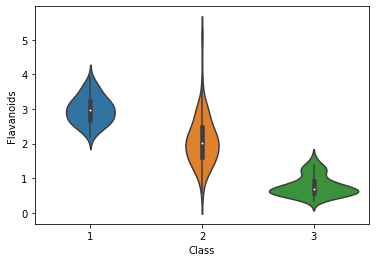

In [23]:
sns.violinplot(x=dataset['Class'], y=dataset['Flavanoids'])

<AxesSubplot:xlabel='Class', ylabel='TotalPhenols'>

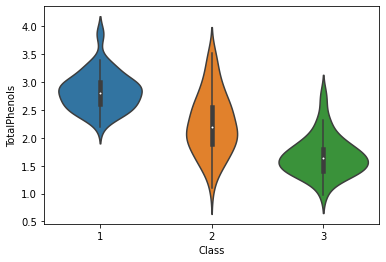

In [25]:
sns.violinplot(x=dataset['Class'], y=dataset['TotalPhenols'])

<AxesSubplot:xlabel='Class', ylabel='Hue'>

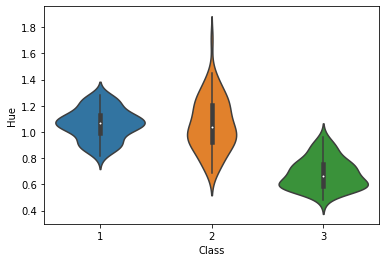

In [33]:
sns.violinplot(x=dataset['Class'], y=dataset['Hue'])

<AxesSubplot:xlabel='Class', ylabel='0D280/OD315'>

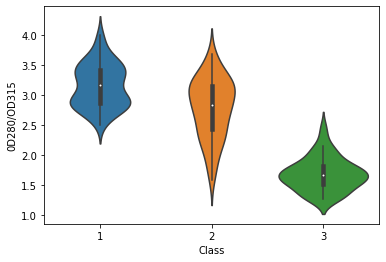

In [34]:
sns.violinplot(x=dataset['Class'], y=dataset['0D280/OD315'])

In [27]:
correlation = dataset.corr()
correlation

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,0D280/OD315,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
MalicAcid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
AlcalinityOfAsh,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
TotalPhenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
NonflavanoidPhenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


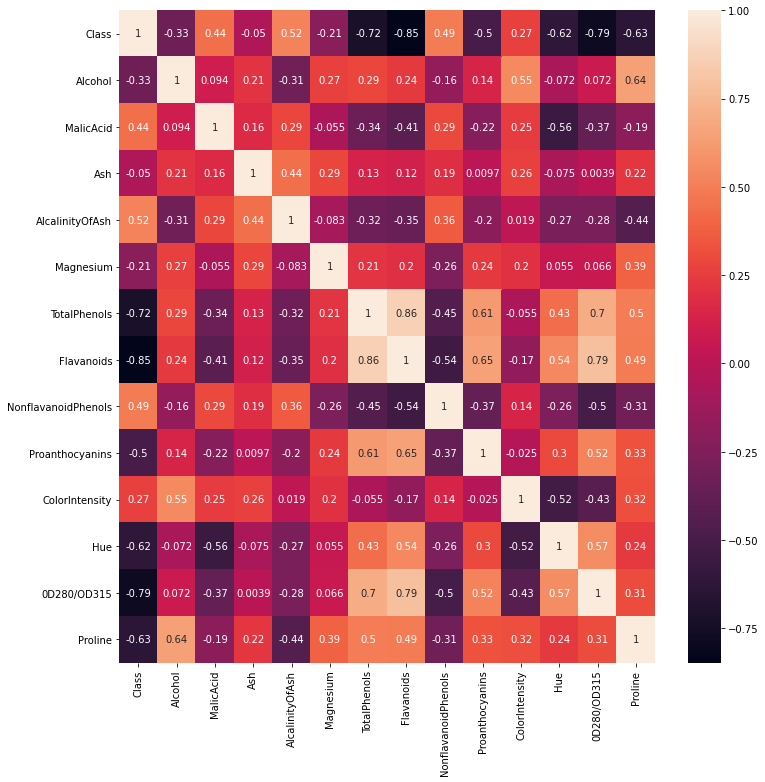

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation, annot=True)
plt.show()
/
#High correlation between Wine Class and {TotalPhenols, Flavanoids, Hue, and 0D280/OD315}